<a href="https://colab.research.google.com/github/MasDiptha12/Machine-Learning/blob/main/Week_3/Classification_Income/Income.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()  # Upload file CSV dari komputer

import pandas as pd

# Membaca file income.csv
df = pd.read_csv("income.csv")

# Tampilkan 5 baris pertama untuk melihat struktur data
df.head()

Saving income.csv to income.csv


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
# Cek apakah ada nilai kosong di dataset
print("Jumlah nilai kosong per kolom:")
print(df.isnull().sum())

# Hapus baris yang mengandung nilai kosong
df = df.dropna()

# Tampilkan tipe data setiap kolom
print("\nTipe data setiap kolom:")
print(df.dtypes)

# Encode kolom target 'income' (misal: <=50K jadi 0, >50K jadi 1)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['income'] = le.fit_transform(df['income'])

# One-Hot Encoding: ubah fitur kategorikal menjadi numerik
df = pd.get_dummies(df, drop_first=True)

# Tampilkan data hasil pra-pemrosesan
print("\nDataset setelah pra-pemrosesan:")
df.head()

Jumlah nilai kosong per kolom:
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

Tipe data setiap kolom:
age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

Dataset setelah pra-pemrosesan:


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,77516,13,2174,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,50,83311,13,0,0,13,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,38,215646,9,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,53,234721,7,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,28,338409,13,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [4]:
# Pisahkan fitur dan target
X = df.drop(columns=['income'])  # Fitur
y = df['income']                 # Target

# Bagi data ke training dan testing (80% - 20%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [14]:
# Import model machine learning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Buat model K-NN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)  # Training model K-NN

# Buat model Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)  # Training model Decision Tree


DecisionTreeClassifier(random_state=42)

In [15]:
# Prediksi kelas
y_pred_knn = knn_model.predict(X_test)
y_pred_dt = dt_model.predict(X_test)

# Prediksi probabilitas (untuk ROC AUC)
y_prob_knn = knn_model.predict_proba(X_test)
y_prob_dt = dt_model.predict_proba(X_test)


In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

# Fungsi evaluasi dengan semua metrik
def evaluate_model(name, y_true, y_pred):
    print(f"== {name} ==")
    print("Akurasi  :", accuracy_score(y_true, y_pred))
    print("Presisi  :", precision_score(y_true, y_pred, average='weighted'))
    print("Recall   :", recall_score(y_true, y_pred, average='weighted'))
    print("F1 Score :", f1_score(y_true, y_pred, average='weighted'))
    print()

# Evaluasi K-NN dan Decision Tree
evaluate_model("K-NN", y_test, y_pred_knn)
evaluate_model("Decision Tree", y_test, y_pred_dt)


== K-NN ==
Akurasi  : 0.4869291338582677
Presisi  : 0.43136414691599795
Recall   : 0.4869291338582677
F1 Score : 0.43913902177304714

== Decision Tree ==
Akurasi  : 0.47653543307086615
Presisi  : 0.4785707963031097
Recall   : 0.47653543307086615
F1 Score : 0.47746378014334345



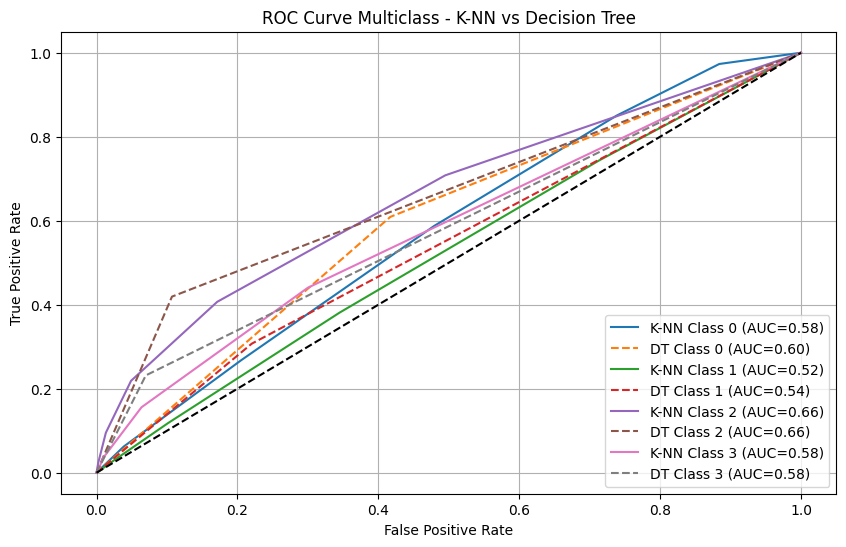

In [17]:
import numpy as np
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Binarisasi y_test
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)

# ROC K-NN
fpr_knn, tpr_knn, roc_auc_knn = dict(), dict(), dict()
for i in range(len(classes)):
    fpr_knn[i], tpr_knn[i], _ = roc_curve(y_test_bin[:, i], y_prob_knn[:, i])
    roc_auc_knn[i] = auc(fpr_knn[i], tpr_knn[i])

# ROC Decision Tree
fpr_dt, tpr_dt, roc_auc_dt = dict(), dict(), dict()
for i in range(len(classes)):
    fpr_dt[i], tpr_dt[i], _ = roc_curve(y_test_bin[:, i], y_prob_dt[:, i])
    roc_auc_dt[i] = auc(fpr_dt[i], tpr_dt[i])

# Plot semua kelas
plt.figure(figsize=(10, 6))
for i in range(len(classes)):
    plt.plot(fpr_knn[i], tpr_knn[i], label=f'K-NN Class {i} (AUC={roc_auc_knn[i]:.2f})')
    plt.plot(fpr_dt[i], tpr_dt[i], linestyle='--', label=f'DT Class {i} (AUC={roc_auc_dt[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Multiclass - K-NN vs Decision Tree')
plt.legend(loc='lower right')
plt.grid()
plt.show()


PERBANDINGAN KEDUA MODEL

In [20]:
# Import display untuk tabel rapi
from IPython.display import display

# 📊 Simpan hasil evaluasi model dalam dictionary
results = {
    "Metrik": ["Akurasi", "Presisi", "Recall", "F1 Score", "AUC"],
    "K-NN": [
        round(accuracy_score(y_test, y_pred_knn), 2),
        round(precision_score(y_test, y_pred_knn, average='weighted'), 2),
        round(recall_score(y_test, y_pred_knn, average='weighted'), 2),
        round(f1_score(y_test, y_pred_knn, average='weighted'), 2),
        round(roc_auc_score(y_test_bin, y_prob_knn, multi_class='ovr'), 2)
    ],
    "Decision Tree": [
        round(accuracy_score(y_test, y_pred_dt), 2),
        round(precision_score(y_test, y_pred_dt, average='weighted'), 2),
        round(recall_score(y_test, y_pred_dt, average='weighted'), 2),
        round(f1_score(y_test, y_pred_dt, average='weighted'), 2),
        round(roc_auc_score(y_test_bin, y_prob_dt, multi_class='ovr'), 2)
    ]
}

# Buat DataFrame hasil evaluasi
df_results = pd.DataFrame(results)

# 🖨️ Tampilkan tabel rapi
print("📊 Perbandingan Evaluasi Model K-NN vs Decision Tree")
display(df_results.style.set_table_attributes("style='display:inline'").set_caption("Tabel Evaluasi Model"))

📊 Perbandingan Evaluasi Model K-NN vs Decision Tree


,Metrik,K-NN,Decision Tree
0,Akurasi,0.490000,0.480000
1,Presisi,0.430000,0.480000
2,Recall,0.490000,0.480000
3,F1 Score,0.440000,0.480000
4,AUC,0.580000,0.590000


PENJELASAN MATEMATIS

### Penjelasan Matematika Evaluasi Model Klasifikasi

---

#### **1. Akurasi**
Mengukur proporsi prediksi yang benar dari keseluruhan data:
$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

- TP: True Positive (positif yang diprediksi benar)
- TN: True Negative (negatif yang diprediksi benar)
- FP: False Positive (negatif yang salah diprediksi positif)
- FN: False Negative (positif yang salah diprediksi negatif)

---

#### **2. Presisi**
Presisi mengukur seberapa banyak dari yang diprediksi positif ternyata benar:
$$
\text{Precision} = \frac{TP}{TP + FP}
$$

---

#### **3. Recall**
Recall (atau Sensitivitas) mengukur seberapa banyak data positif yang berhasil ditemukan:
$$
\text{Recall} = \frac{TP}{TP + FN}
$$

---

#### **4. F1 Score**
F1 Score adalah rata-rata harmonik dari presisi dan recall:
$$
F1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$

---

#### **5. AUC (Area Under Curve)**
AUC adalah luas di bawah kurva ROC (Receiver Operating Characteristic). AUC mengukur kemampuan model dalam membedakan antara kelas.

Nilai AUC berada antara 0 sampai 1:
- 1 = sempurna
- 0.5 = acak
- 0 = buruk

---

#### **6. ROC Curve**
Kurva ROC adalah grafik antara:

- **TPR (True Positive Rate)**:
$$
TPR = \frac{TP}{TP + FN}
$$

- **FPR (False Positive Rate)**:
$$
FPR = \frac{FP}{FP + TN}
$$

Semakin dekat ROC ke sudut kiri atas, semakin baik performa model.
